# Modelos

[LOF Clustering](LOF.ipynb)

[Spectral Clustering](Spectral.ipynb)

In [1]:
import predictionModels as pm
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

2022-03-30 11:29:15.251892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-30 11:29:15.252113: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
random.seed(1)
def balancedCut(df ,n ,frac = [0.5], target = 'Class',classes=[0,1]):
    print(f'{"="*50}\nbalancedCut\n{"="*50}')
    print(f'Realizando seleccion de la muestra la muestra')
    newDfs = []
    if sum(frac) > 1:
        print(f'Valor de la fraccion incorrecto: --> {sum(frac)} > 1')
        
    if len(frac) < len(classes):
        frac.append(1-sum(frac))
    
    for cl,fc in zip(classes, frac):
        ndf = df[df[target]==cl]
        ro = ndf.shape[0]
        print(f'Dataset de clase --> {cl}')
        if int(fc*n) > ro:
            newDfs.append(ndf)
            print(f'\tFilas: {ro}')
        else:
            newDfs.append(ndf.sample(n=int(fc*n)))
            print(f'\tFilas: {int(fc*n)}')
    
    return pd.concat(newDfs), newDfs[1].shape[0]/newDfs[0].shape[0]

In [3]:
cards = pd.read_csv("/home/vcalzada/Work/proyecto/modelos/creditcard.csv")
cards = cards.sample(frac=1)


cards.head()

df, frac = balancedCut(cards, 30000, frac=[0.9])
x = df.iloc[:,0:-1].to_numpy()

y = df.iloc[:,-1].to_numpy() 

balancedCut
Realizando seleccion de la muestra la muestra
Dataset de clase --> 0
	Filas: 27000
Dataset de clase --> 1
	Filas: 492


In [4]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [5]:
red_pca = pm.ReductionDim('pca', x)
red_pca.initParams(args=2)
x_pca = red_pca.fit_predict()
x_pca

array([[-0.39929645,  0.49261808],
       [ 0.05842847, -0.24948389],
       [ 0.43010874, -0.30995083],
       ...,
       [18.42328907,  0.38841606],
       [ 6.86615659,  2.78844967],
       [-0.28456286, -0.3970363 ]])

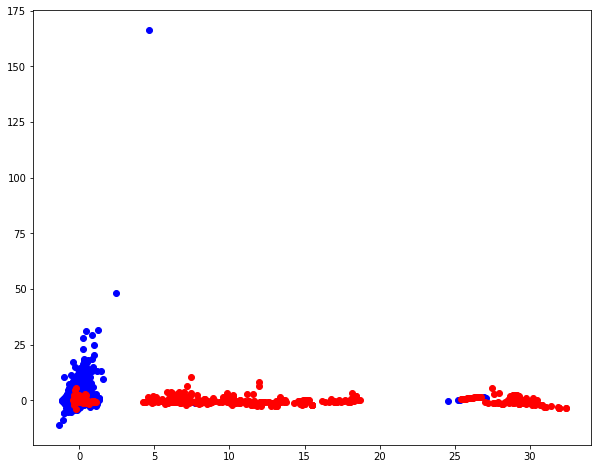

In [6]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x_pca[y==0,0], x_pca[y==0,1], color="blue")
plt.scatter(x_pca[y==1,0], x_pca[y==1,1], color="red")
plt.show()

In [7]:
print(str(red_pca))

___________________________________________________________________________
Reduccion --> pca
	Numero de parametros final --> 2
___________________________________________________________________________


In [8]:
red_encoder = pm.ReductionDim('encoder', x)
args = ([512,128], 2,18,10)
capas, finalDim, batch_size, epochs = args
red_encoder.initParams(args)
x_encoder = red_encoder.fit_predict()
x_encoder

2022-03-30 11:30:00.714431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-30 11:30:00.714593: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 11:30:00.714678: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (L-1802005): /proc/driver/nvidia/version does not exist
2022-03-30 11:30:00.720381: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1528/1528 [==============================] - 25s 15ms/step - loss: 0.9375 - val_loss: 0.9135
Epoch 2/10
1527/1528 [============================>.] - ETA: 0s - loss: 0.9127

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x_encoder[y==0,0], x_encoder[y==0,1], color="blue")
plt.scatter(x_encoder[y==1,0], x_encoder[y==1,1], color="red")
plt.show()

In [ ]:
print(red_encoder)

In [ ]:
mod_som = pm.Analisis('som', x_encoder)

In [ ]:
args = [0.99,0.2,'gaussian',0.070]
mod_som.initParams(args)
y_pred = mod_som.fit_predict()

In [ ]:

import numpy as np
y_pred = np.array(y_pred)

In [ ]:

plt.figure(figsize=(8, 8))
plt.scatter(x_encoder[y==0, 0], x_encoder[y==0, 1],
            label='inlier',color="blue")
plt.scatter(x_encoder[y==1, 0], x_encoder[y==1, 1],
            label='outlier',color="red")
plt.legend()
plt.show()


plt.figure(figsize=(8, 8))
plt.scatter(x_encoder[y_pred==0, 0], x_encoder[y_pred==0, 1],
            label='inlier',color="blue")
plt.scatter(x_encoder[y_pred==1, 0], x_encoder[y_pred==1, 1],
            label='outlier',color="red")
plt.legend()
plt.show()

In [ ]:
mod_iso = pm.Analisis('isoForest', x)

In [ ]:
frac

In [ ]:
mod_iso.initParams(0.016)
y_pred = mod_iso.fit_predict()

In [ ]:

plt.figure(figsize=(8, 8))
plt.scatter(x_encoder[y==0, 0], x_encoder[y==0, 1],
            label='inlier',color="blue")
plt.scatter(x_encoder[y==1, 0], x_encoder[y==1, 1],
            label='outlier',color="red")
plt.legend()
plt.show()


plt.figure(figsize=(8, 8))
plt.scatter(x_encoder[y_pred==0, 0], x_encoder[y_pred==0, 1],
            label='inlier',color="blue")
plt.scatter(x_encoder[y_pred==1, 0], x_encoder[y_pred==1, 1],
            label='outlier',color="red")
plt.legend()
plt.show()